<a href="https://colab.research.google.com/github/2303a52160/generative-AI_2025/blob/main/2303A52160_WEEK7_ASSIGNMENT_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6074 - loss: 0.6631 - val_accuracy: 0.6234 - val_loss: 0.6195
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7136 - loss: 0.5810 - val_accuracy: 0.7013 - val_loss: 0.5665
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7494 - loss: 0.5339 - val_accuracy: 0.7143 - val_loss: 0.5464
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7739 - loss: 0.4875 - val_accuracy: 0.7143 - val_loss: 0.5360
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7698 - loss: 0.4784 - val_accuracy: 0.7273 - val_loss: 0.5319
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7430 - loss: 0.4802 - val_accuracy: 0.7143 - val_loss: 0.5264
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7512 - loss: 0.4882 - val_accuracy: 0.7273 - val_loss: 0.5260
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7564 - loss: 0.5043 - val_accuracy: 0.7273 - val_loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy: 0.7143
Precision: 0.6250
Recall: 0.6667
F1 Score: 0.6452
Confusion Matrix:
[[35 12]
 [10 20]]


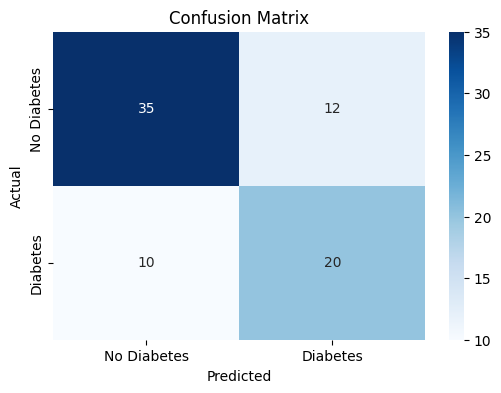

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/diabetes.csv')

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

def diabetes_prediction_model(shape):
    model = Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(shape,)))
    model.add(Dense(15, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

diabetes_model = diabetes_prediction_model(x_train.shape[1])

diabetes_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = diabetes_model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=250, batch_size=32)

diabetes_model.save('diabetes_model.h5')

loaded_model = load_model('diabetes_model.h5')

y_pred = (loaded_model.predict(x_test_scaled) > 0.5).astype('int')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
